In [1]:
path='/kaggle/input/att-database-of-faces'

In [2]:
import numpy as np
import shap
import os
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score, ConfusionMatrixDisplay

In [3]:
images=[]
for person in range(1, 41):
    temp = []
    for pose in range(1, 11):
        image_path = f'{path}/s{person}/{pose}.pgm'
        image = plt.imread(image_path)
        temp.append(image)
    images.append(np.array(temp))
dataset_faces = np.array(images)

# Print the dataset information
print('Total number of datasets:', len(dataset_faces))
print('Dataset size:', dataset_faces.shape)

Total number of datasets: 40
Dataset size: (40, 10, 112, 92)


In [4]:
num_subjects, num_images_per_subject, height, width = dataset_faces.shape
x = dataset_faces.reshape(num_subjects * num_images_per_subject, height, width, 1)  # Adding channel dimension
y = np.repeat(np.arange(num_subjects), num_images_per_subject)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

y_train=to_categorical(y_train,num_subjects)
y_test=to_categorical(y_test,num_subjects)   

In [5]:
model=Sequential([
    Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.001), activation='relu',strides=1,padding='same',input_shape=(112,92,1)),
    MaxPool2D((2,2)),

    Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu',strides=1,padding='same'),
    MaxPool2D((2,2)),

    Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu',strides=1,padding='same'),
    MaxPool2D((2,2)),

    Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu',strides=1,padding='same'),
    MaxPool2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(40,activation='softmax')
])

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [6]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,validation_split=0.3,batch_size=32)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - accuracy: 0.0248 - loss: 3.8458 - val_accuracy: 0.0208 - val_loss: 3.8243
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0429 - loss: 3.8067 - val_accuracy: 0.0312 - val_loss: 3.7998
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0554 - loss: 3.7777 - val_accuracy: 0.0104 - val_loss: 3.7829
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0457 - loss: 3.7365 - val_accuracy: 0.0312 - val_loss: 3.7598
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0348 - loss: 3.6928 - val_accuracy: 0.0000e+00 - val_loss: 3.7097
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0751 - loss: 3.5667 - val_accuracy: 0.0208 - val_loss: 3.6309
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1277 - loss: 3.2994 - val_accuracy: 0.1354 - val_loss: 3.5677
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1888 - loss: 3.1265 - val_accuracy: 0.1771 - val_

In [7]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'Test accuracy:{test_accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 499ms/step - accuracy: 0.8555 - loss: 0.6390
Test accuracy:0.875


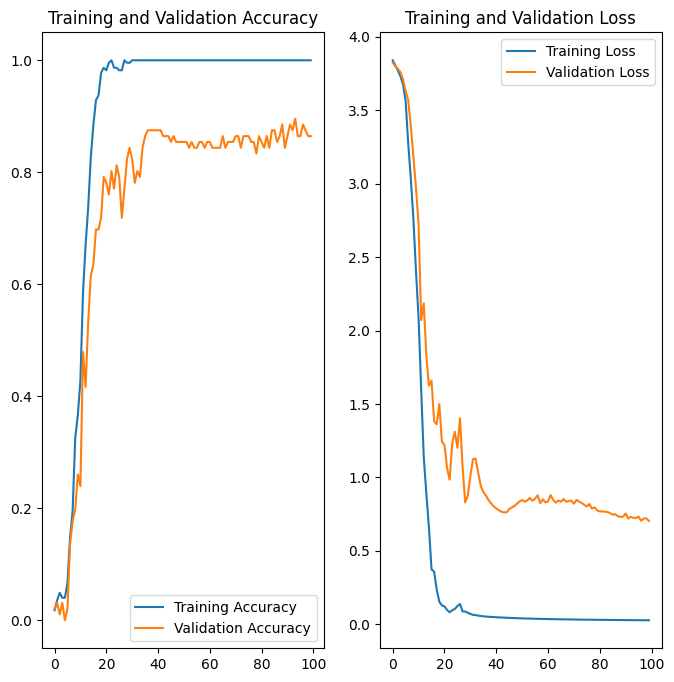

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
y_pred_probs = model.predict(x_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step
Precision: 0.8989583333333332
Recall: 0.875
F1 Score: 0.8642261904761905


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


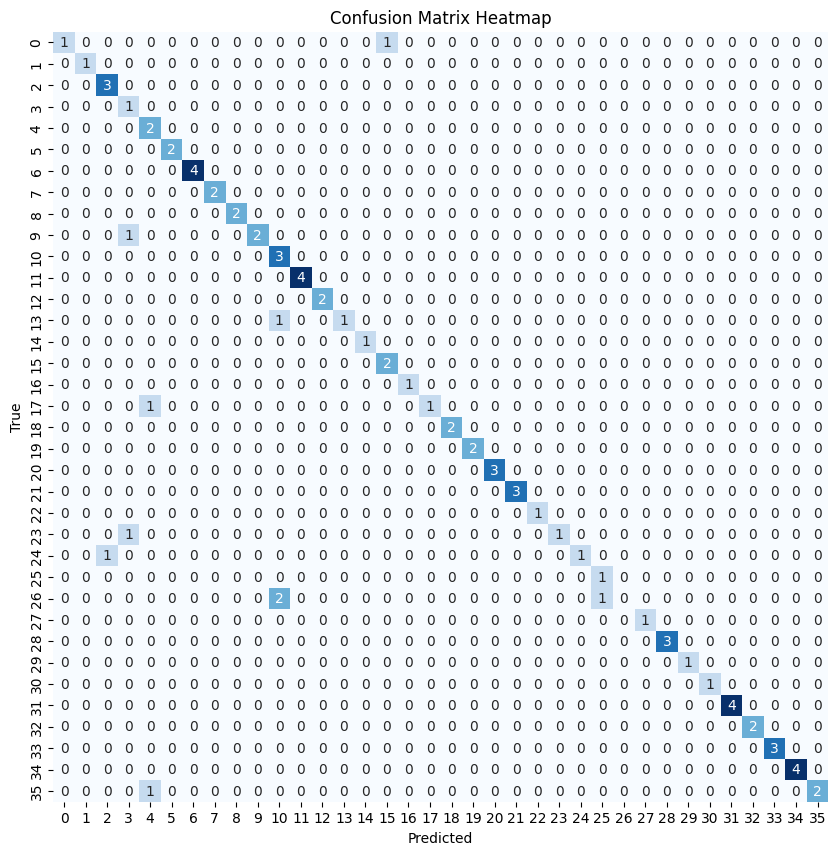

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Applying shap

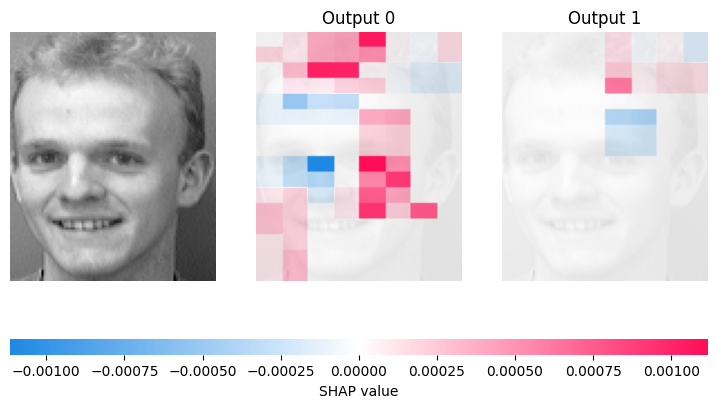

In [11]:
masker = shap.maskers.Image("inpaint_telea", x[0].shape)
explainer = shap.Explainer(model, masker)
shap_values = explainer(x[40:41], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:2])
shap.image_plot(shap_values)

  0%|          | 0/1998 [00:00<?, ?it/s]

PartitionExplainer explainer:  40%|████      | 2/5 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

PartitionExplainer explainer:  80%|████████  | 4/5 [00:18<00:03,  3.34s/it]

  0%|          | 0/1998 [00:00<?, ?it/s]

PartitionExplainer explainer: 6it [00:30,  7.55s/it]


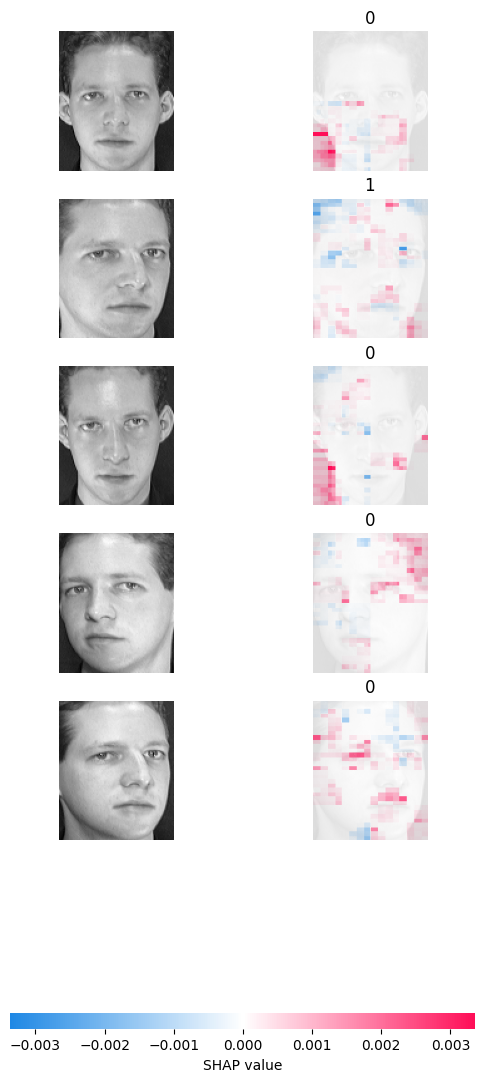

In [12]:
'''def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)'''

masker = shap.maskers.Image("inpaint_telea", x[0].shape)
explainer = shap.Explainer(model, masker, output_names=y)
shap_values = explainer(x[0:5], max_evals=2000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
shap.image_plot(shap_values)